In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("bank (1).csv")
#print(data.head(20))

In [35]:
data["housing"] = data["housing"].replace("yes",1)
data["housing"] = data["housing"].replace("no",0)
data["loan"] = data["loan"].replace("yes",1)
data["loan"] = data["loan"].replace("no",0)
data["default"] = data["default"].replace("yes",1)
data["default"] = data["default"].replace("no",0)
data["deposit"] = data["deposit"].replace("yes",1)
data["deposit"] = data["deposit"].replace("no",0)
data["poutcome"] = data["poutcome"].replace("failure",0)
print(data.tail(20))

       age           job   marital  education  default  balance  housing  \
11142   52        admin.  divorced  secondary        0       48        0   
11143   38    unemployed  divorced  secondary        0      189        1   
11144   60       retired   married  secondary        0        0        1   
11145   60       retired  divorced   tertiary        0     -134        0   
11146   30        admin.   married  secondary        1       23        0   
11147   44    unemployed   married  secondary        0        0        0   
11148   32   blue-collar   married  secondary        0        1        1   
11149   46  entrepreneur   married  secondary        0     3317        0   
11150   34    management   married  secondary        0      355        0   
11151   40    management   married   tertiary        0      917        1   
11152   34     housemaid   married  secondary        0      390        1   
11153   43        admin.    single  secondary        0       35        0   
11154   52  

In [5]:
from scipy import stats
stats.kstest(data.balance, 'norm')

KstestResult(statistic=0.8611299442905344, pvalue=0.0)

In [3]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data['deposit'] = labelEncoder.fit_transform(data['deposit'])
data['marital'] = labelEncoder.fit_transform(data['marital'])
data['education'] = labelEncoder.fit_transform(data['education'])
data['default'] = labelEncoder.fit_transform(data['default'])
data['housing'] = labelEncoder.fit_transform(data['housing'])
data['loan'] = labelEncoder.fit_transform(data['loan'])
data['poutcome'] = labelEncoder.fit_transform(data['poutcome'])

In [5]:
data["month"].value_counts().sort_values(ascending = False).head(20)

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [6]:
data["job"].value_counts().sort_values(ascending = False).head(20)

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [7]:
def one_hot_encode_top(df, col, top_6_labels):
    for label in top_6_labels:
        df[col+'_'+label] = np.where(df[col] == label,1,0)
bank_new = pd.read_csv('bank (1).csv', usecols = ['job', 'month']) 

In [8]:
top_6_labels = [x for x in data["job"].value_counts().sort_values(ascending = False).head(12).index]
one_hot_encode_top(data, "job", top_6_labels)
data.head()
#burada meslek isimlerini sütün yaparak o mesleğe sahip olan müşterinin ilgili sütünunu 1 olarak gösterdim 
#bu sayede dataseti 0-1'ler ile doldurmaya çalıştım

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_technician,job_admin.,job_services,job_retired,job_self-employed,job_student,job_unemployed,job_entrepreneur,job_housemaid,job_unknown
0,59,admin.,1,1,0,2343,1,0,unknown,5,...,0,1,0,0,0,0,0,0,0,0
1,56,admin.,1,1,0,45,0,0,unknown,5,...,0,1,0,0,0,0,0,0,0,0
2,41,technician,1,1,0,1270,1,0,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,55,services,1,1,0,2476,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,0
4,54,admin.,1,2,0,184,0,0,unknown,5,...,0,1,0,0,0,0,0,0,0,0


In [9]:
top_6_labels = [x for x in data["month"].value_counts().sort_values(ascending = False).head(6).index]
one_hot_encode_top(data, "month", top_6_labels)
data.head()
#burada yukarıdaki işlemi aylar için yaptım

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jul,month_jun,month_nov,month_apr,month_feb,month_oct,month_jan,month_sep,month_mar,month_dec
0,59,admin.,1,1,0,2343,1,0,unknown,5,...,0,0,0,0,0,0,0,0,0,0
1,56,admin.,1,1,0,45,0,0,unknown,5,...,0,0,0,0,0,0,0,0,0,0
2,41,technician,1,1,0,1270,1,0,unknown,5,...,0,0,0,0,0,0,0,0,0,0
3,55,services,1,1,0,2476,1,0,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,54,admin.,1,2,0,184,0,0,unknown,5,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.drop(columns = ["job", "month"], axis =1, inplace = True)

data.head()


,age,marital,education,default,balance,housing,loan,contact,day,duration,...,month_jul,month_jun,month_nov,month_apr,month_feb,month_oct,month_jan,month_sep,month_mar,month_dec
0,59,1,1,0,2343,1,0,unknown,5,1042,...,0,0,0,0,0,0,0,0,0,0
1,56,1,1,0,45,0,0,unknown,5,1467,...,0,0,0,0,0,0,0,0,0,0
2,41,1,1,0,1270,1,0,unknown,5,1389,...,0,0,0,0,0,0,0,0,0,0
3,55,1,1,0,2476,1,0,unknown,5,579,...,0,0,0,0,0,0,0,0,0,0
4,54,1,2,0,184,0,0,unknown,5,673,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                11162 non-null  int64 
 1   marital            11162 non-null  int32 
 2   education          11162 non-null  int32 
 3   default            11162 non-null  int32 
 4   balance            11162 non-null  int64 
 5   housing            11162 non-null  int32 
 6   loan               11162 non-null  int32 
 7   contact            11162 non-null  object
 8   day                11162 non-null  int64 
 9   duration           11162 non-null  int64 
 10  campaign           11162 non-null  int64 
 11  pdays              11162 non-null  int64 
 12  previous           11162 non-null  int64 
 13  poutcome           11162 non-null  int32 
 14  deposit            11162 non-null  int32 
 15  job_management     11162 non-null  int32 
 16  job_blue-collar    11162 non-null  int32

In [12]:
data = data.drop(columns = "contact", axis = 1)

In [13]:
#dataset tamamen int değerlerden oluşuyor artık 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                11162 non-null  int64
 1   marital            11162 non-null  int32
 2   education          11162 non-null  int32
 3   default            11162 non-null  int32
 4   balance            11162 non-null  int64
 5   housing            11162 non-null  int32
 6   loan               11162 non-null  int32
 7   day                11162 non-null  int64
 8   duration           11162 non-null  int64
 9   campaign           11162 non-null  int64
 10  pdays              11162 non-null  int64
 11  previous           11162 non-null  int64
 12  poutcome           11162 non-null  int32
 13  deposit            11162 non-null  int32
 14  job_management     11162 non-null  int32
 15  job_blue-collar    11162 non-null  int32
 16  job_technician     11162 non-null  int32
 17  job_admin.  

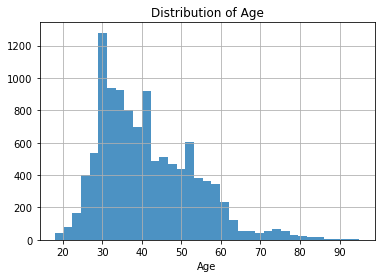

In [10]:
data.hist('age', bins=35, alpha=0.8);
plt.title('Distribution of Age');
plt.xlabel('Age');

In [91]:
age_group = pd.cut(data.age, bins = [18,30,50,70,90,120], labels= ['18-29','30-49','50-69','70-89','90+'])
data.insert(4, 'Age_Group', age_group)
data.sample(20)
#müşterileri yaşlarına göre kategorize ettim

,age,job,marital,education,Age_Group,default,balance_seg,balance,housing,loan,...,job_unemployed,job_entrepreneur,job_housemaid,job_unknown,month_may,month_aug,month_jul,month_jun,month_nov,month_apr
9964,30,services,single,secondary,18-29,0,0-3000,117,0,0,...,0,0,0,0,0,0,0,0,0,0
5236,72,retired,married,secondary,70-89,0,3000-6000,5715,0,0,...,0,0,0,0,1,0,0,0,0,0
7055,29,self-employed,single,tertiary,18-29,0,0-3000,16,1,0,...,0,0,0,0,1,0,0,0,0,0
4958,63,management,married,tertiary,50-69,0,3000-6000,5112,0,0,...,0,0,0,0,0,0,0,0,1,0
7210,35,services,married,secondary,30-49,0,0-3000,377,0,1,...,0,0,0,0,0,0,1,0,0,0
3210,29,technician,single,secondary,18-29,0,0-3000,113,0,0,...,0,0,0,0,0,0,0,0,0,0
7927,46,technician,married,tertiary,30-49,0,3000-6000,4176,1,0,...,0,0,0,0,0,0,0,1,0,0
2821,35,technician,single,secondary,30-49,0,0-3000,183,0,0,...,0,0,0,0,0,0,0,0,0,0
8556,45,technician,divorced,unknown,30-49,1,-3000 - 0,-25,0,1,...,0,0,0,0,0,0,1,0,0,0
3178,39,blue-collar,single,tertiary,30-49,0,0-3000,172,1,0,...,0,0,0,0,0,0,0,0,0,0


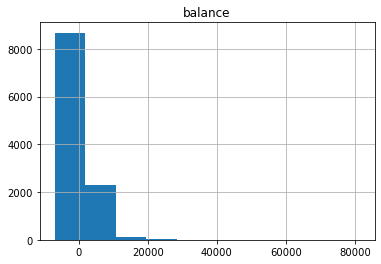

In [29]:
data.hist('balance');

BURADAN İTİBAREN "HOUSİNG", "DEPOSİT", "LOAN", HİZMETLERİNİN MESLEKLER ÜZERİNE DAĞILIMINI İNCELEDİM

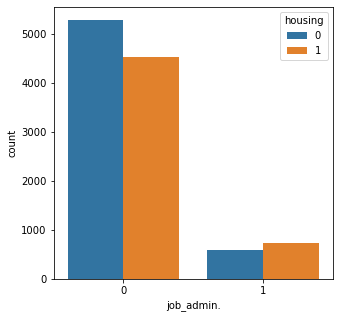

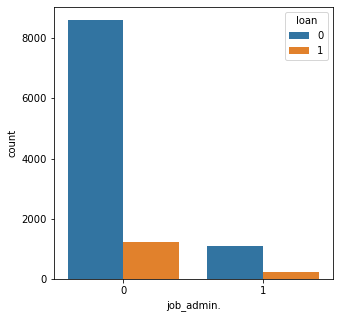

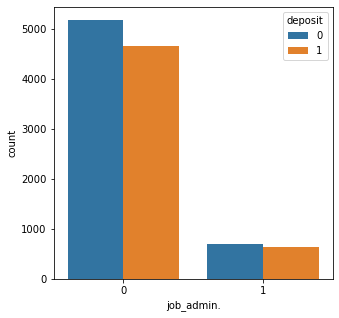

In [62]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_admin.", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_admin.", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_admin.", hue="deposit", data=data)
plt.show()

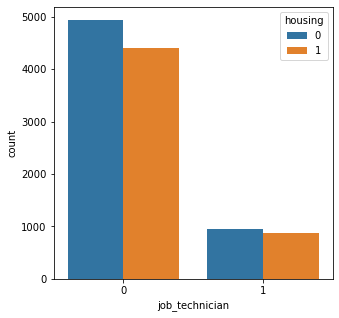

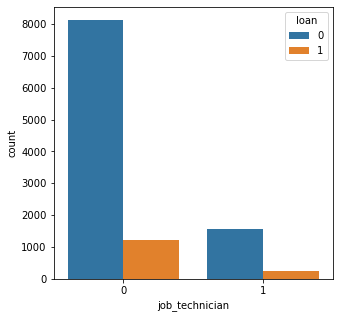

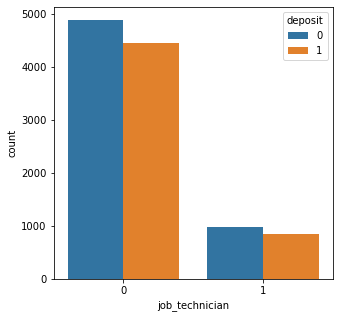

In [63]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_technician", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_technician", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_technician", hue="deposit", data=data)
plt.show()

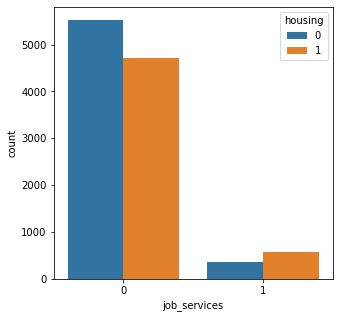

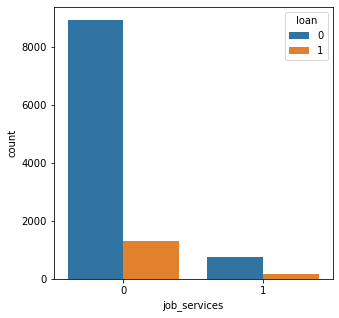

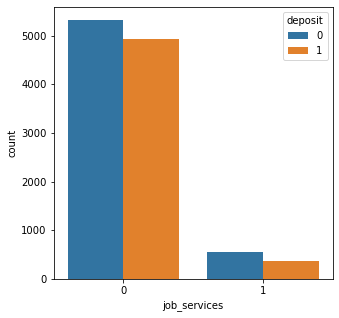

In [64]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_services", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_services", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_services", hue="deposit", data=data)
plt.show()

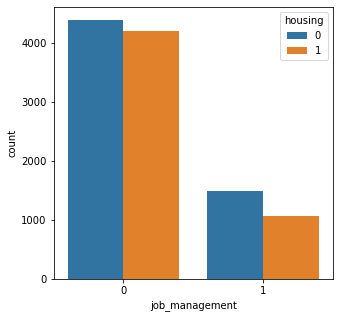

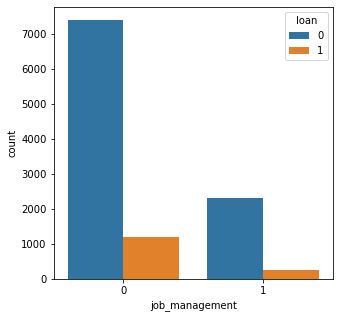

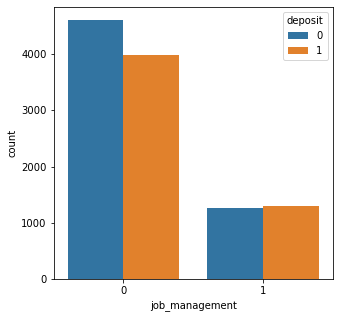

In [65]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_management", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_management", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_management", hue="deposit", data=data)
plt.show()

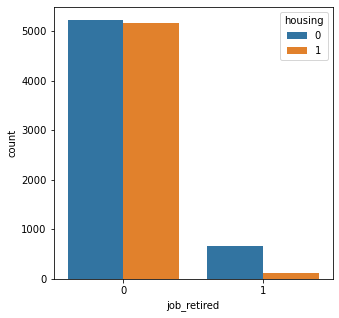

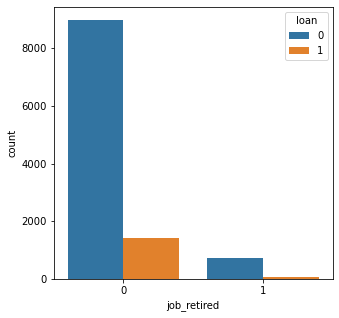

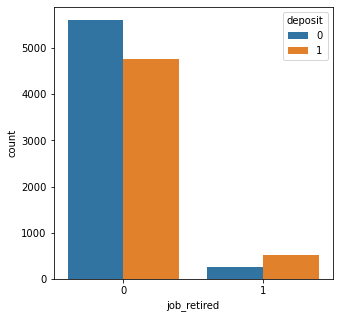

In [66]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_retired", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_retired", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_retired", hue="deposit", data=data)
plt.show()

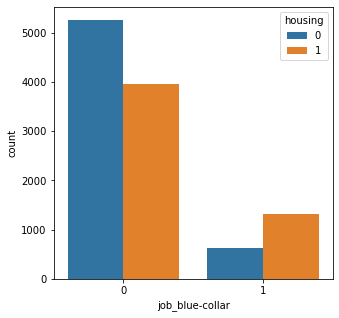

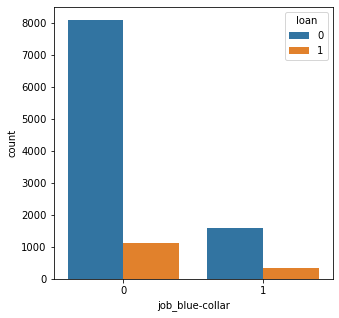

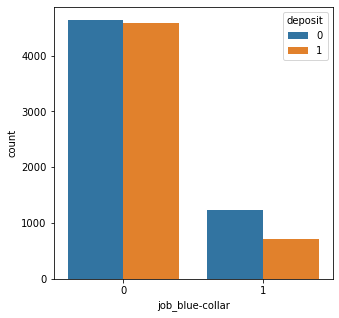

In [67]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_blue-collar", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_blue-collar", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_blue-collar", hue="deposit", data=data)
plt.show()

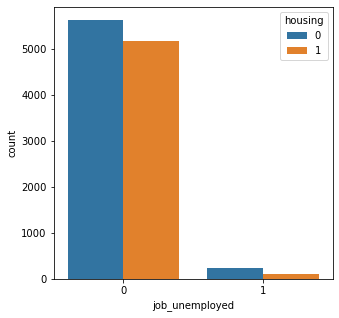

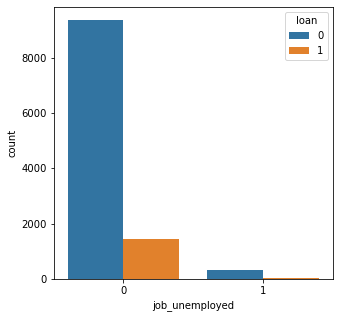

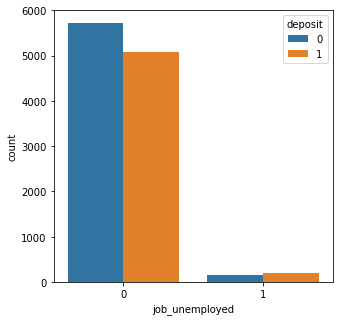

In [68]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_unemployed", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_unemployed", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_unemployed", hue="deposit", data=data)
plt.show()

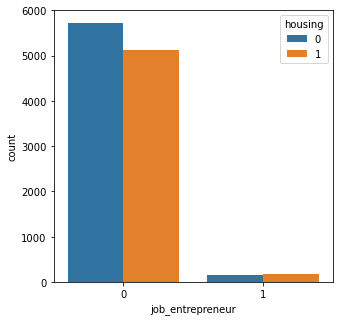

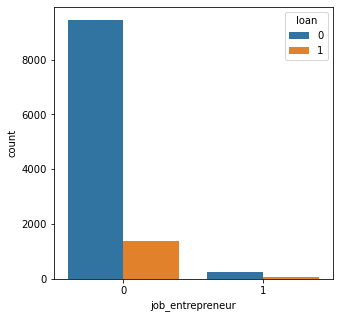

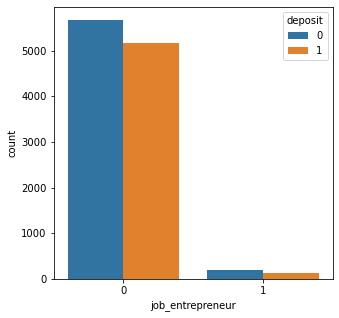

In [69]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_entrepreneur", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_entrepreneur", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_entrepreneur", hue="deposit", data=data)
plt.show()

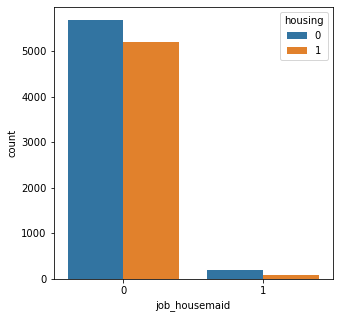

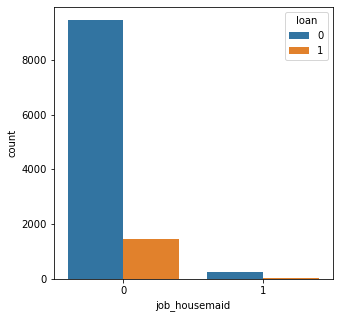

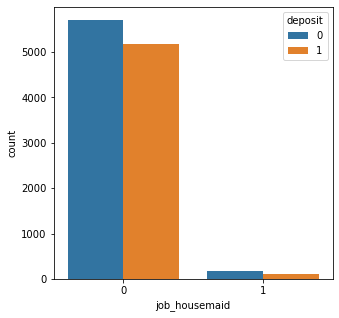

In [70]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_housemaid", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_housemaid", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_housemaid", hue="deposit", data=data)
plt.show()

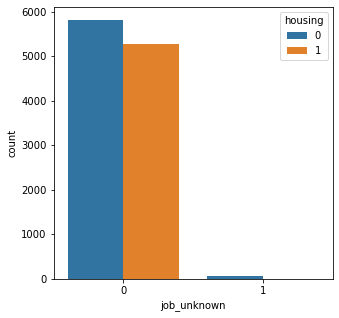

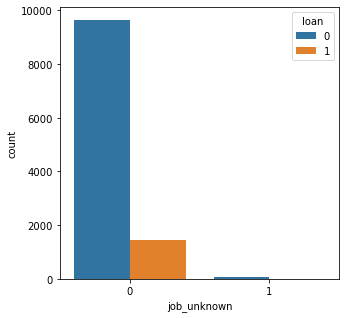

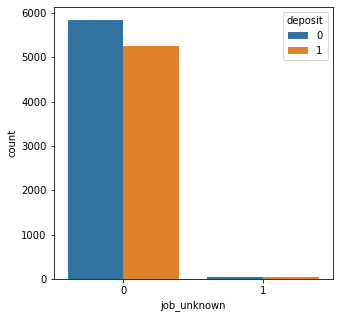

In [71]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_unknown", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_unknown", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_unknown", hue="deposit", data=data)
plt.show()

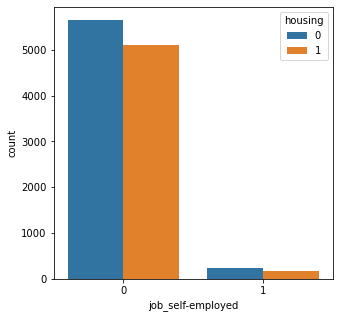

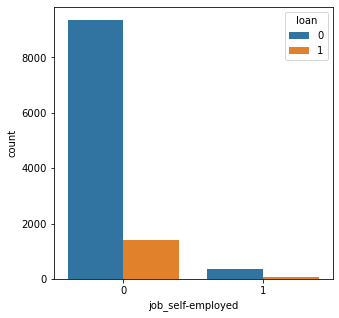

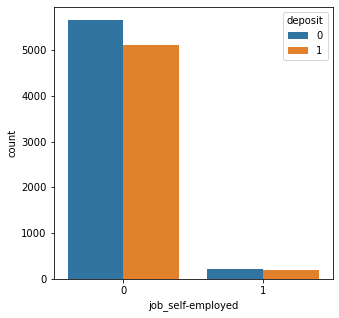

In [72]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_self-employed", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_self-employed", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_self-employed", hue="deposit", data=data)
plt.show()

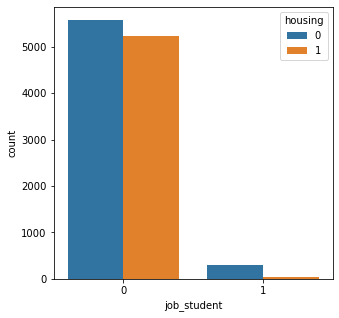

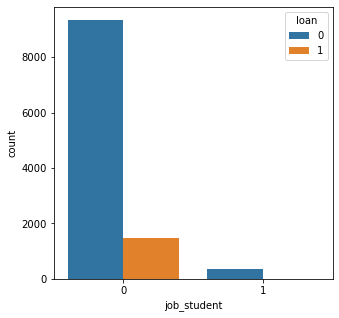

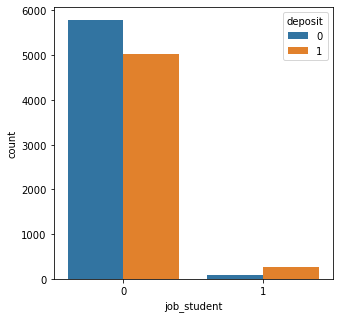

In [73]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_student", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_student", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="job_student", hue="deposit", data=data)
plt.show()

burada müşterileri hesaplarındaki tutara göre kategorize ettim. ardından housing, deposit, loan hizmetlerinin 
balance, age, marital gibi müşteri özelliklerine göre dağılımına baktım

In [87]:
balance_seg = pd.cut(data.balance, bins = [-6900,-3000,0,3000,6000,9000,12000,15000,20000,30000,60000,85000], labels= ['-6901 / -3000','-3000 - 0','0-3000','3000-6000','6000-9000','9000-12000','12000-15000','15000-20000','20000-30000','30000-60000','60000+'])
data.insert(5, 'balance_seg', balance_seg)
data.sample(20)

,age,job,marital,education,default,balance_seg,balance,housing,loan,contact,...,job_unemployed,job_entrepreneur,job_housemaid,job_unknown,month_may,month_aug,month_jul,month_jun,month_nov,month_apr
9852,31,admin.,single,secondary,0,-3000 - 0,-422,1,0,cellular,...,0,0,0,0,1,0,0,0,0,0
10253,40,technician,married,secondary,0,6000-9000,7313,1,0,cellular,...,0,0,0,0,0,0,0,0,1,0
7942,30,blue-collar,married,secondary,0,0-3000,673,1,0,unknown,...,0,0,0,0,1,0,0,0,0,0
1554,59,management,married,tertiary,0,-3000 - 0,0,1,1,cellular,...,0,0,0,0,0,0,0,0,0,1
6557,40,technician,married,secondary,0,-3000 - 0,-496,0,0,telephone,...,0,0,0,0,0,0,1,0,0,0
9509,41,management,single,tertiary,0,-3000 - 0,0,0,0,cellular,...,0,0,0,0,0,1,0,0,0,0
418,45,entrepreneur,married,unknown,0,3000-6000,3133,1,1,cellular,...,0,1,0,0,0,0,1,0,0,0
1350,30,management,single,tertiary,0,3000-6000,3473,0,0,cellular,...,0,0,0,0,0,0,0,0,0,0
6003,26,technician,married,tertiary,0,0-3000,8,1,1,unknown,...,0,0,0,0,1,0,0,0,0,0
5409,34,technician,single,tertiary,0,0-3000,2047,1,0,cellular,...,0,0,0,0,0,0,1,0,0,0


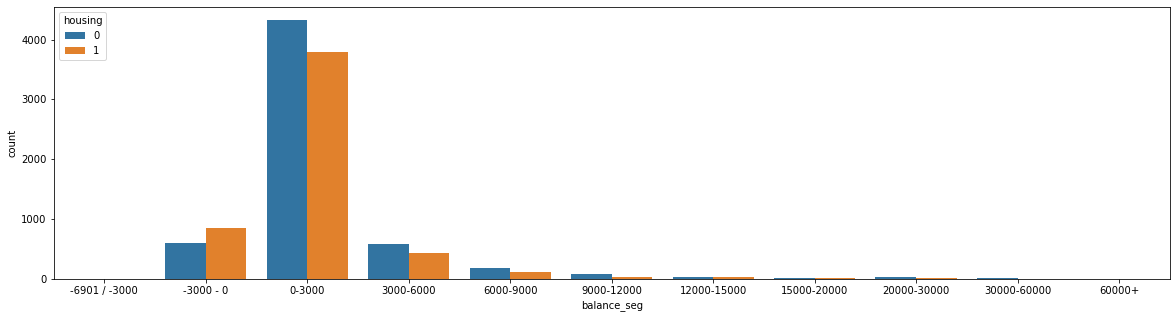

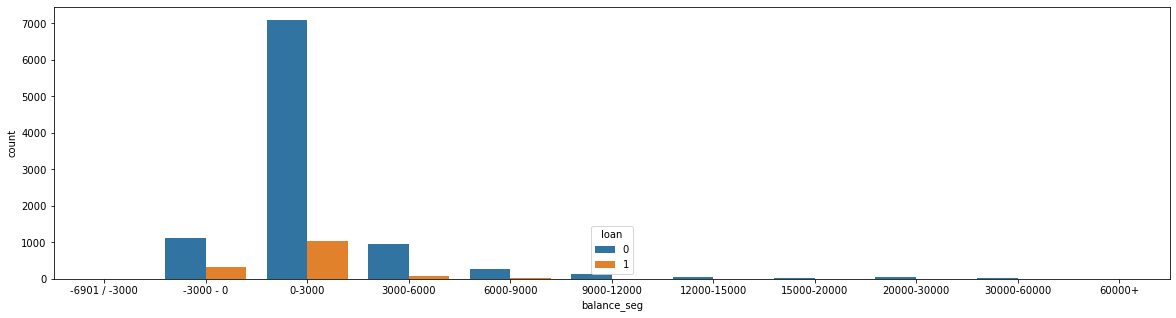

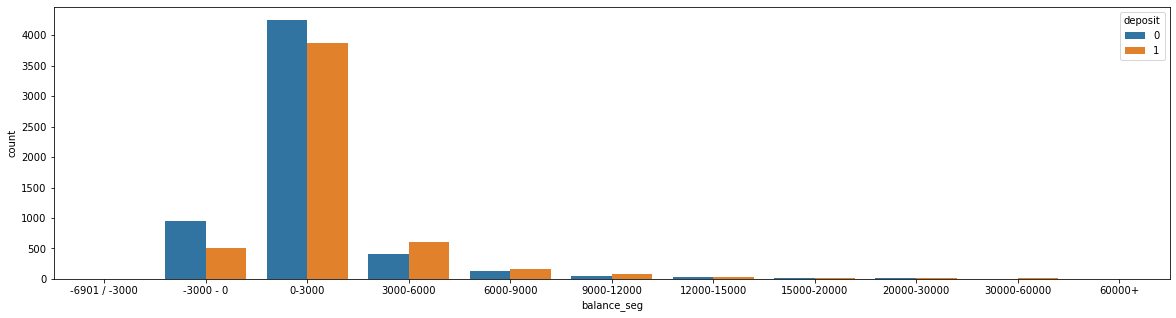

In [90]:
plt.figure(figsize=[20,5])
cx = sns.countplot(x="balance_seg", hue="housing", data=data)
plt.show()
plt.figure(figsize=[20,5])
cx = sns.countplot(x="balance_seg", hue="loan", data=data)
plt.show()
plt.figure(figsize=[20,5])
cx = sns.countplot(x="balance_seg", hue="deposit", data=data)
plt.show()

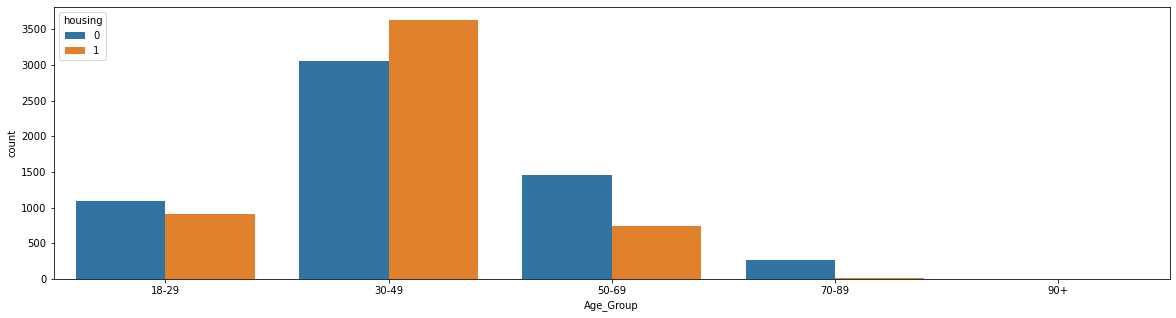

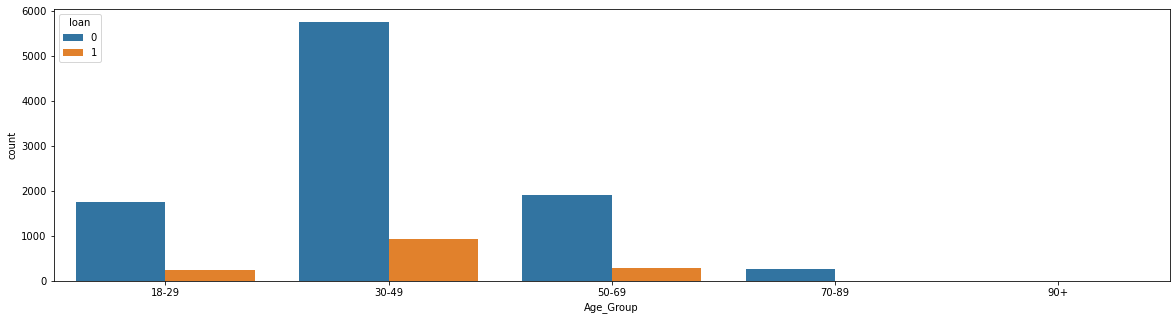

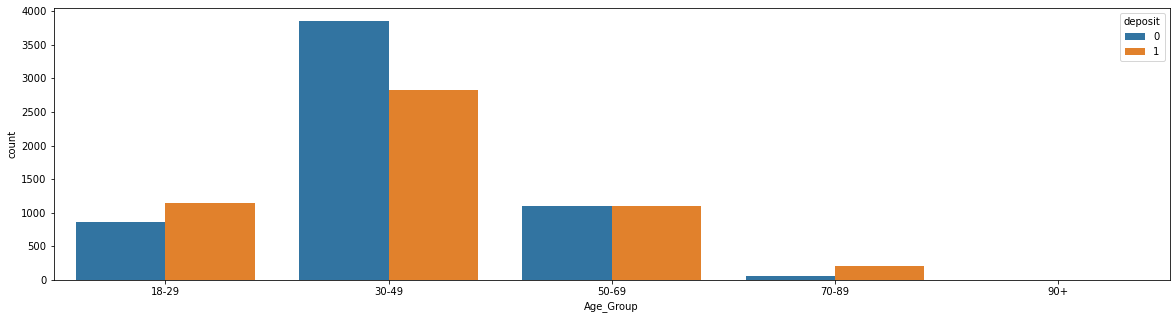

In [92]:
plt.figure(figsize=[20,5])
cx = sns.countplot(x="Age_Group", hue="housing", data=data)
plt.show()
plt.figure(figsize=[20,5])
cx = sns.countplot(x="Age_Group", hue="loan", data=data)
plt.show()
plt.figure(figsize=[20,5])
cx = sns.countplot(x="Age_Group", hue="deposit", data=data)
plt.show()

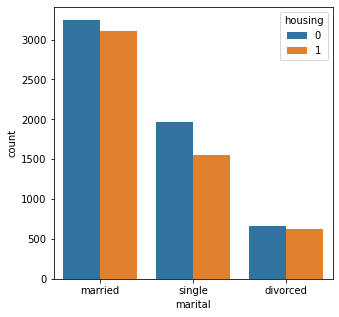

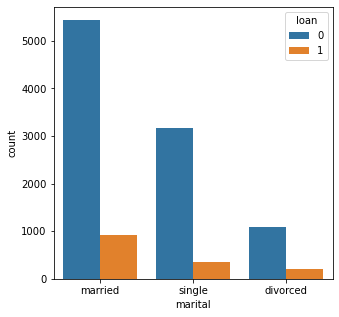

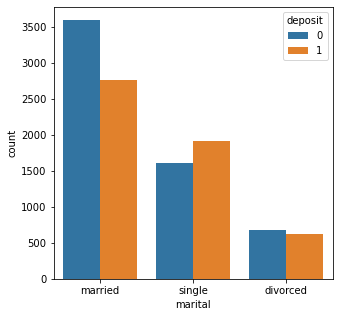

In [94]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="marital", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="marital", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="marital", hue="deposit", data=data)
plt.show()

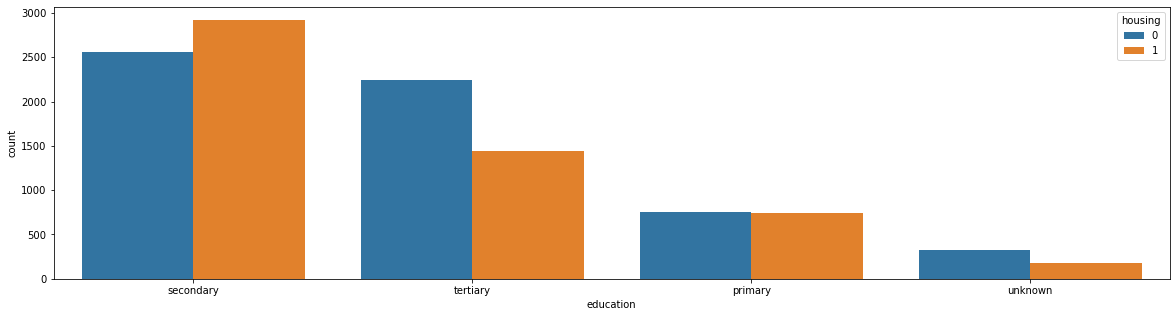

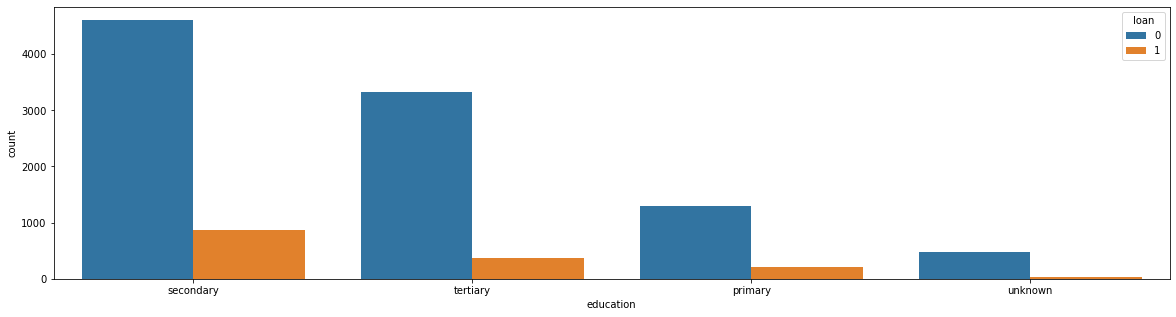

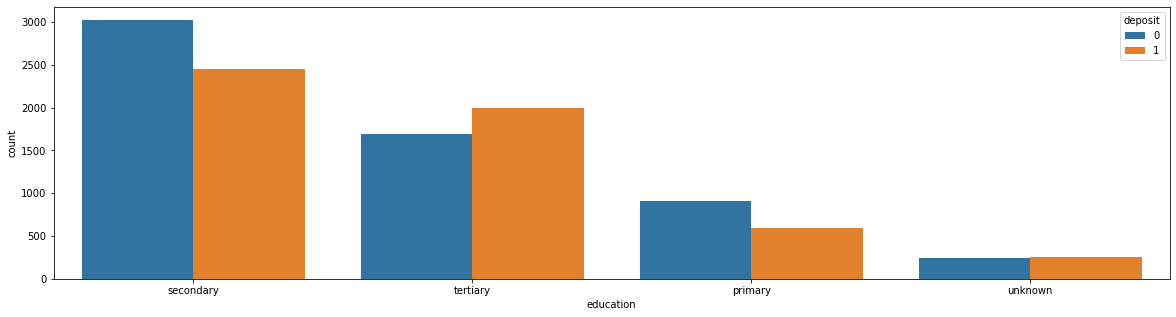

In [95]:
plt.figure(figsize=[20,5])
cx = sns.countplot(x="education", hue="housing", data=data)
plt.show()
plt.figure(figsize=[20,5])
cx = sns.countplot(x="education", hue="loan", data=data)
plt.show()
plt.figure(figsize=[20,5])
cx = sns.countplot(x="education", hue="deposit", data=data)
plt.show()

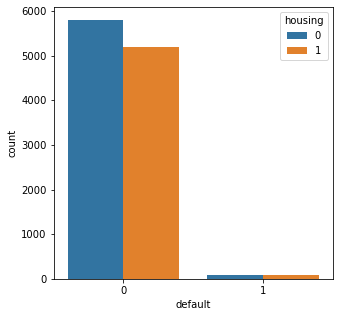

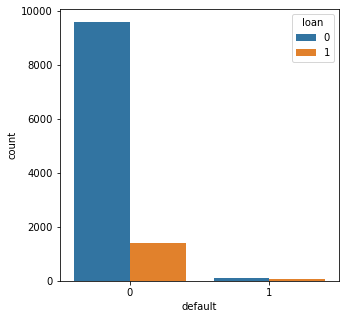

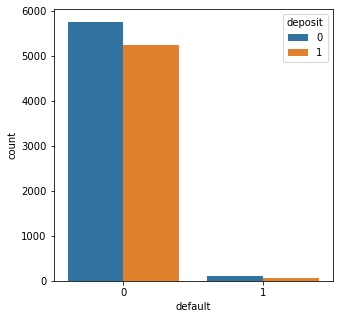

In [97]:
plt.figure(figsize=[5,5])
cx = sns.countplot(x="default", hue="housing", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="default", hue="loan", data=data)
plt.show()
plt.figure(figsize=[5,5])
cx = sns.countplot(x="default", hue="deposit", data=data)
plt.show()